This is the jupyter notebook I (Luke Sabor) used to generate the graphs for my post "My Naive AI Forecasts".  

Author:  
Luke Sabor  
lukesabor@gmail.com  

Approximate date: 11/30/2022  
url: [TBD]  


In [17]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statistics import NormalDist

%matplotlib inline


In [314]:
# plotting functions

def plot_gamma(start, mean, stdev, end=None, offset=0, **plotargs):
    """
    displays and returns a plot of a gamma distribution (a righthand skewed
    distribution with a minimum value)

    start:  lower bound of the graph
    mean:   mean of the distribution
    stdev:  standard deviation of the distribution
    end:    the upper bound of the graph (automatically calculated if not given)
    offset: the period between start and when the distribution begins
    **plotargs: any additional arguments given to plt.plot
    """

    lower = start+offset

    mu = mean-lower
    var = stdev**2
    shape = mu**2 / var
    beta = mu / var

    if end is None:
        end = lower + mu + 3*stdev


    x = np.linspace(start, end, 100)
    gamma = stats.gamma(a=shape, loc=lower, scale=1/beta)
    y = gamma.pdf(x)

    fig=plt.figure(figsize=(9,5), dpi=100)
    axes = fig.add_axes([0.1,0.1,0.9,0.9])
    if title := plotargs.pop('title'):
        axes.set_title(title)
    axes.plot(x,y,**plotargs)
    axes.set_ylim([0,max(y)*1.15])
    axes.set_yticklabels([])
    axes.set_xlim([start,end])
    axes.set_xlabel('Year')
    
    # plot mean, stdev, median, Q1, and Q3
    
    axes.stem(mean,gamma.pdf(mean), linefmt=("-.", 'r'))
    axes.text(mean,gamma.pdf(mean)*1.07, f"$\mu=${mean}", backgroundcolor=[1,1,1,.75])
    ystdev = gamma.pdf(mean)*0.1
    xstdevmin = mean-stdev
    xstdevmax = mean+stdev
    axes.hlines(y=ystdev, xmin=xstdevmin, xmax=xstdevmax,
                linewidth=0.75, color='r', linestyles='-')
    axes.scatter([xstdevmin,xstdevmax],[ystdev]*2, color='r', marker='|')
    axes.text(xstdevmin, ystdev*1.4, f'$\mu-\sigma^2=${round(xstdevmin)}',
                horizontalalignment="center", backgroundcolor=[1,1,1,.75])
    axes.text(xstdevmax, ystdev*1.4, f'$\mu+\sigma^2=${round(xstdevmax)}', 
                horizontalalignment="center", backgroundcolor=[1,1,1,.75])
    
    median = gamma.median()
    Q1, Q3 = gamma.interval(.5)
    axes.stem(median,gamma.pdf(median), linefmt=(":", 'g'))
    axes.text(median,gamma.pdf(median)*1.07, f"median$=${round(median)}", backgroundcolor=[1,1,1,.75])
    axes.stem(Q1,gamma.pdf(Q1), linefmt=(":", 'g'))
    axes.text(Q1,gamma.pdf(Q1)*1.07, f"Q1$=${round(Q1)}", backgroundcolor=[1,1,1,.75])
    axes.stem(Q3,gamma.pdf(Q3), linefmt=(":", 'g'))
    axes.text(Q3,gamma.pdf(Q3)*1.07, f"Q3$=${round(Q3)}", backgroundcolor=[1,1,1,.75])

    return fig, axes


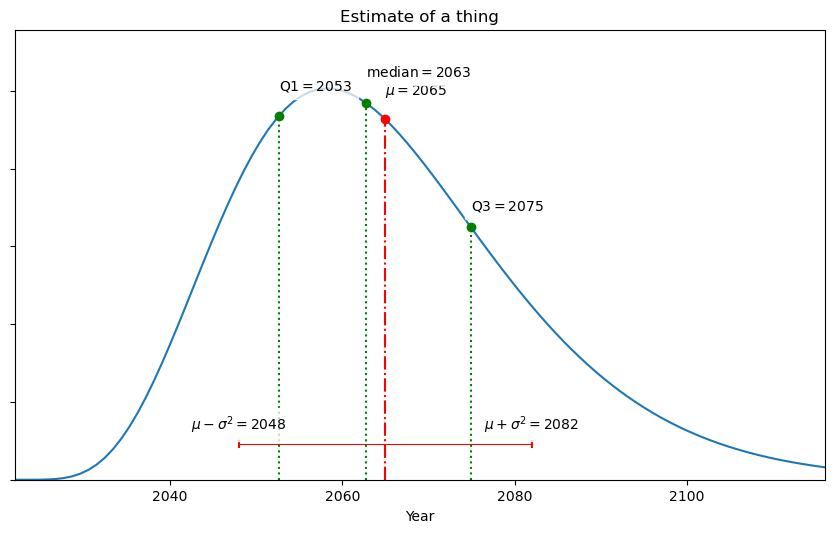

In [315]:
start = 2022
mean = 2065
stdev = 17
title="Estimate of a thing"

fig, axes = plot_gamma(start, mean, stdev, title=title)